# Basic Usage

# Bivariate Copulas 

## General Introduction to Copulas

A copula is a method used to describe the dependence structure between several random variables, which have been widely used in research fields, such as finance and hydrology. While some other multivariate distributions, such as a multivariate normal, allows only for a highly symmetric dependence structure with the same univariate and multivariate marginals distributions, copulas can model the joint distribution of multiple random variables separately from their marginal distributions.

The Copula is a multivariabe distribution with all univariate margins being $U(0,1)$ (joe et al), which is best descrived by Sklar's Theorem . Sklar's Theorem essentially states that any multivariate joint distribution function can be decomposed into marginal distributions and a copula function that describes the dependence structure between the variables.

**Sklar's Theorem:** Let $F$ be the joint distribution function of a multivariate random vector $(X_1, X_2, \ldots, X_n)$, with marginal distribution functions $F_1, F_2, \ldots, F_n$ for each variable. Then, there exists a copula function $C: [0,1]^n \rightarrow [0,1]$ such that for all $(x_1, x_2, \ldots, x_n)$ in the support of $F$, we have:


$$
\begin{equation}
F(x_1, x_2, \ldots, x_n) = C(F_1(x_1), F_2(x_2), \ldots, F_n(x_n)) \quad 
\label{eq:sklar} \tag{1}
\end{equation}
$$



In this tutorial we will further explain bivariate copulas with the use of an example dataset  

In [1]:
# Loading necessary data packages
import matplotlib.pyplot as plt

import sys
sys.path.append('') #'your-path-to/osm-flex/src'

import osm_flex
import osm_flex.download as dl
import osm_flex.extract as ex
import osm_flex.config
import osm_flex.clip as cp

osm_flex.enable_logs()

### Step 1: Downloading data dumps

Per default, an `osm/osm_bpf` folder is created in your home directory, and all data dumps are downloaded to this path. This can be changed in the `osm_flex.config` module by modifying the variable `OSM_DATA_DIR`

In [2]:
# Download the Switzerland country file from download.geofabrik.de 
# downloads requested file only if necessary, and returns save path
iso3 = 'CHE'
path_che_dump = dl.get_country_geofabrik(iso3)
print(f'Saved as {path_che_dump}')

INFO:osm_flex.download:Skip existing file: /Users/evelynm/osm/osm_bpf/switzerland-latest.osm.pbf


Saved as /Users/evelynm/osm/osm_bpf/switzerland-latest.osm.pbf


Download Central America regional file from geofabrik to`~/osm/osm_bpf/central-america-latest.osm.pbf` folder

In [3]:
region = 'central-america'
path_ca_dump = dl.get_region_geofabrik(region)
print(f'Saved as {path_ca_dump}')

INFO:osm_flex.download:Skip existing file: /Users/evelynm/osm/osm_bpf/central-america-latest.osm.pbf


Saved as /Users/evelynm/osm/osm_bpf/central-america-latest.osm.pbf


### Step 2: Extracting geospatial data

**Option 1:** 

Using pre-written wrappers for certain critical infrastructure types (check which ones are available), with the method `extract_cis`. 

They can be further configured in the `DICT_CIS_OSM` dictionary located in the config file 

In [4]:
# available wrapper categories:
osm_flex.config.DICT_CIS_OSM.keys()

dict_keys(['education', 'healthcare', 'water', 'telecom', 'road', 'main_road', 'rail', 'air', 'gas', 'oil', 'power', 'wastewater', 'food', 'buildings'])

In [5]:
# check the signature of the extraction function
? ex.extract_cis

In [6]:
gdf_che_mainroad = ex.extract_cis(path_che_dump, 'main_road')

extract points: 0it [00:07, ?it/s]
extract lines: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117861/117861 [00:16<00:00, 7217.83it/s]


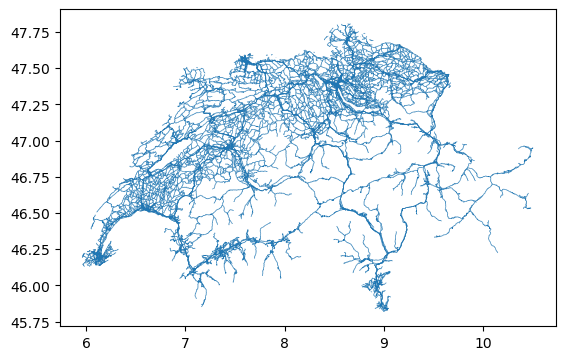

In [12]:
fig, ax = plt.subplots()
gdf_che_mainroad.plot(ax=ax, linewidth=0.5)
fig.suptitle('Main roads in Switzerland')
plt.show()

**Option 2:** 

Using key (and value) tags from OSM (check [https://taginfo.openstreetmap.org/]) with the method `extract`

In [5]:
# Example using keys and value constraints 
gdf_ca_forest = ex.extract(path_ca_dump,'multipolygons',
                            ['landuse', 'name'], 
                            "landuse='forest'")

Warning 1: Non closed ring detected. To avoid accepting it, set the OGR_GEOMETRY_ACCEPT_UNCLOSED_RING configuration option to NO
extract multipolygons: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████| 7578/7578 [01:39<00:00, 76.31it/s]


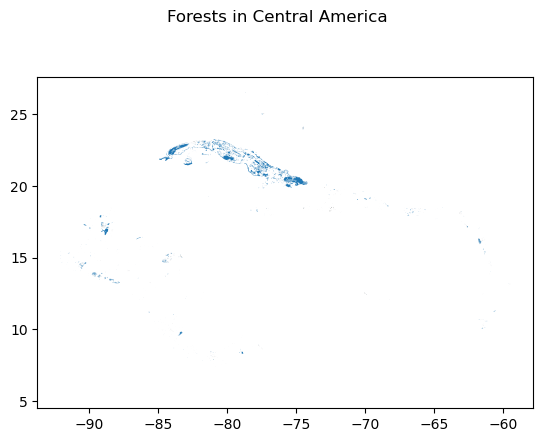

In [16]:
fig, ax = plt.subplots()
gdf_ca_forest.plot(ax=ax)
fig.suptitle('Forests in Central America')
plt.show()

In [5]:
# Example using only a key (i.e., parse all items which have a non-null entry for the first key)
gdf_che_bldgs = ex.extract(path_che_dump,'multipolygons', 
                          ['building', 'name'])

extract multipolygons: 100%|█████████████████████████████████████████████████████████████████████████████████████████| 2608882/2608882 [02:02<00:00, 21261.05it/s]


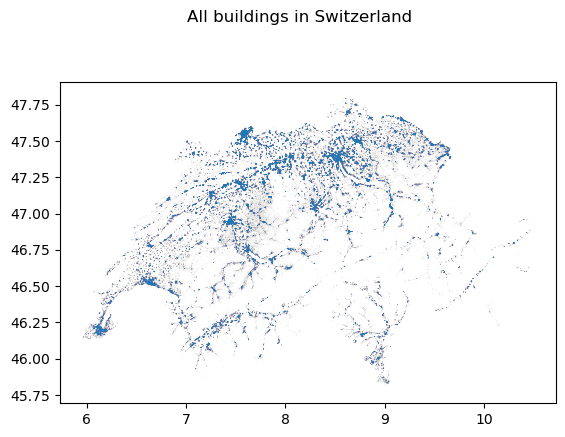

In [6]:
fig, ax = plt.subplots()
gdf_che_bldgs.plot(ax=ax)
fig.suptitle('All buildings in Switzerland')
plt.show()

### Optional Step: Clipping data

For custom data dumps, the planet, regional or country files can be clipped (=cut) to a user-defined geographical extent and saved as new osm.pbf file using the `clip` module. Instructions can be found in tutorial 1_clipping_shapes.

### Optional Step: Simplifying data

Parsing data can result in duplicates or near-dupicates, or yield too many results. A few simple methods are provided in the `simplify` module to handle this. Instructions can be found in tutorial 2_simplifications.